In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df['Attrition'].unique())                                # ['Yes' 'No']
print(df['BusinessTravel'].unique())                       # ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
print(df['Department'].unique())                      # ['Sales' 'Research & Development' 'Human Resources']
print(df['EducationField'].unique())    # ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree' 'Human Resources']
print(df['Gender'].unique())         # ['Female' 'Male']
print(df['JobRole'].unique())             # ['Sales Executive' 'Research Scientist' 'Laboratory Technician' 'Manufacturing Director' 'Healthcare Representative' 'Manager' 'Sales Representative' 'Research Director' 'Human Resources']
print(df['MaritalStatus'].unique())            # ['Single' 'Married' 'Divorced']
print(df['OverTime'].unique())                      # ['Yes' 'No']

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


In [6]:
#Label Encoding of all the Categorical Variables
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()
df['Attrition']=pd.DataFrame(lb.fit_transform(df['Attrition']))
df['Department']=pd.DataFrame(lb.fit_transform(df['Department']))
df['BusinessTravel']=pd.DataFrame(lb.fit_transform(df['BusinessTravel']))
df['EducationField']=pd.DataFrame(lb.fit_transform(df['EducationField']))
df['Gender']=pd.DataFrame(lb.fit_transform(df['Gender']))
df['JobRole']=pd.DataFrame(lb.fit_transform(df['JobRole']))
df['MaritalStatus']=pd.DataFrame(lb.fit_transform(df['MaritalStatus']))
df['OverTime']=pd.DataFrame(lb.fit_transform(df['OverTime']))
df  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# EmployeeNumber is of no use in EDA and the other 3 columns dropped are having only a single constant value for all rows
# EmployeeCount = 1 (single constant value for all rows)
# Over18 = 'Y' (single constant value for all rows)
# StandardHours = 80  (single constant value for all rows)  
df1=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)  
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [9]:
collist=df1.columns.values
ncol=16
nrows=10 

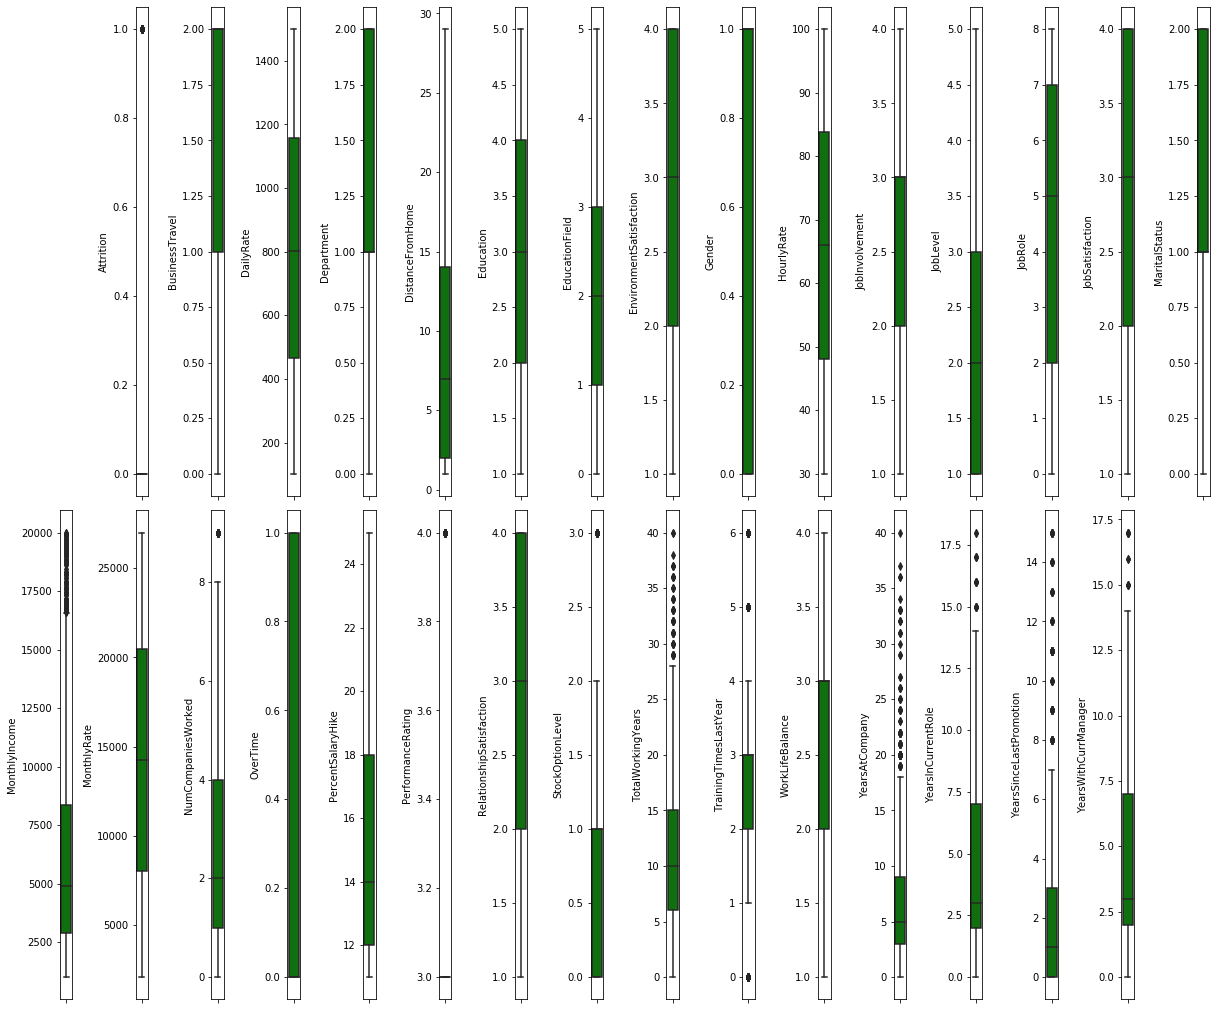

In [10]:
plt.figure(figsize=(17,70))     # Outliers shown in the boxplots are not abnormal, all those can be possible values so I am not removing any outliers
for i in range(1,len(collist)): 
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [11]:
df1.skew()                                    # Checking Skewness

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [12]:
import numpy as np                                            # Removing Skewness 
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col]) 

In [13]:
df1.skew()                            #  checking skewness again

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

In [14]:
import numpy as np                                            # Removing Skewness little further
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(np.log1p(df1[col])) 

In [15]:
df1.skew()                             # checking skewness after removing skewness for the second time

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

In [16]:
df1.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.068204,1.607483,802.485714,1.260544,1.981542,2.912925,1.092825,2.721769,0.600000,...,0.632980,2.712245,0.479273,2.294246,1.271081,2.761224,1.811729,1.378737,0.348150,1.350077
std,9.135373,0.155619,0.665455,403.509100,0.527792,0.856168,1.024165,0.416952,1.093082,0.490065,...,0.016851,1.081209,0.453966,0.698631,0.377816,0.706476,0.756870,0.794116,0.303554,0.806270
min,18.000000,0.000000,0.000000,102.000000,0.000000,0.693147,1.000000,0.000000,1.000000,0.000000,...,0.625800,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,1.098612,2.000000,0.693147,2.000000,0.000000,...,0.625800,2.000000,0.000000,1.945910,1.098612,2.000000,1.386294,1.098612,0.000000,1.098612
50%,36.000000,0.000000,2.000000,802.000000,1.000000,2.079442,3.000000,1.098612,3.000000,1.000000,...,0.625800,3.000000,0.693147,2.397895,1.386294,3.000000,1.791759,1.386294,0.423036,1.386294
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,2.708050,4.000000,1.386294,4.000000,1.000000,...,0.625800,4.000000,0.693147,2.772589,1.386294,3.000000,2.302585,2.079442,0.625800,2.079442
max,60.000000,0.423036,2.000000,1499.000000,2.000000,3.401197,5.000000,1.791759,4.000000,1.000000,...,0.672503,4.000000,1.386294,3.713572,1.945910,4.000000,3.713572,2.944439,0.844907,2.890372


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DD3218588>,
      dtype=object)

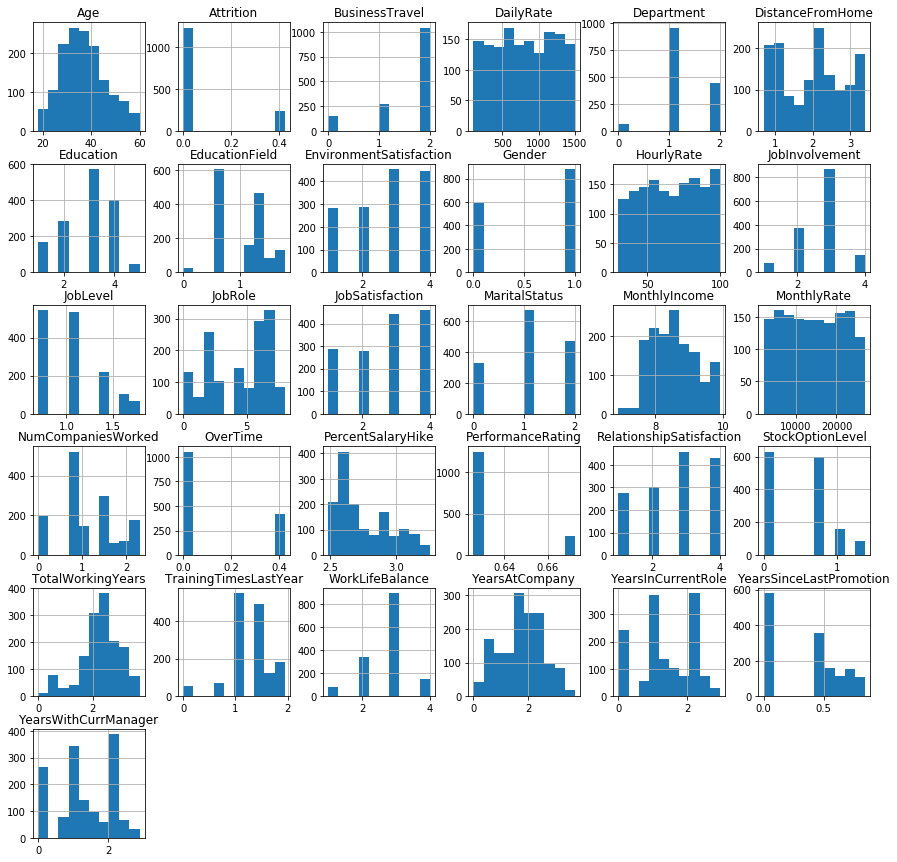

In [17]:
df1.hist(figsize=(15,15))  

In [18]:
df1.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.021954,0.208034,-0.035481,0.010146,-0.036311,...,0.001904,0.053535,0.055976,0.655104,-0.011374,-0.021490,0.267636,0.186114,0.164965,0.175515
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.078073,-0.031373,0.015616,-0.103369,0.029453,...,0.002889,-0.045872,-0.166288,-0.230891,-0.064085,-0.063939,-0.198467,-0.187618,-0.057013,-0.190667
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.008412,0.000757,0.027543,0.004174,-0.032981,...,-0.026341,-0.035986,-0.015829,0.038578,0.018629,-0.011256,-0.010094,-0.023235,-0.028836,-0.016147
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.003108,-0.016806,0.037893,0.018355,-0.011716,...,0.000473,0.007846,0.040742,0.022324,0.004537,-0.037848,-0.009964,0.010113,-0.038139,0.004183
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.028399,0.007996,0.080573,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012132,-0.004276,0.043479,0.026383,0.018808,0.047113,0.014178,0.021202
DistanceFromHome,-0.021954,0.078073,-0.008412,-0.003108,0.028399,1.000000,0.019415,0.017048,-0.009395,0.007314,...,0.011243,0.009518,0.027230,-0.002682,-0.019181,-0.023031,0.007503,0.016233,-0.001825,0.003858
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.019415,1.000000,-0.040902,-0.027128,-0.016547,...,-0.024539,-0.009118,0.017248,0.174816,-0.018439,0.009819,0.061454,0.056752,0.025224,0.052555
EducationField,-0.035481,0.015616,0.027543,0.037893,0.080573,0.017048,-0.040902,1.000000,0.038699,-0.009393,...,-0.001816,-0.006164,-0.014369,-0.007709,0.051390,0.040343,0.000795,0.006237,0.015517,0.018315
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.009395,-0.027128,0.038699,1.000000,0.000508,...,-0.029548,0.007665,0.010914,-0.022419,-0.013588,0.027627,0.008722,0.016859,0.032185,0.000847
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,0.007314,-0.016547,-0.009393,0.000508,1.000000,...,-0.013859,0.022868,0.011966,-0.040833,-0.034406,-0.002753,-0.042585,-0.037489,-0.023448,-0.025222


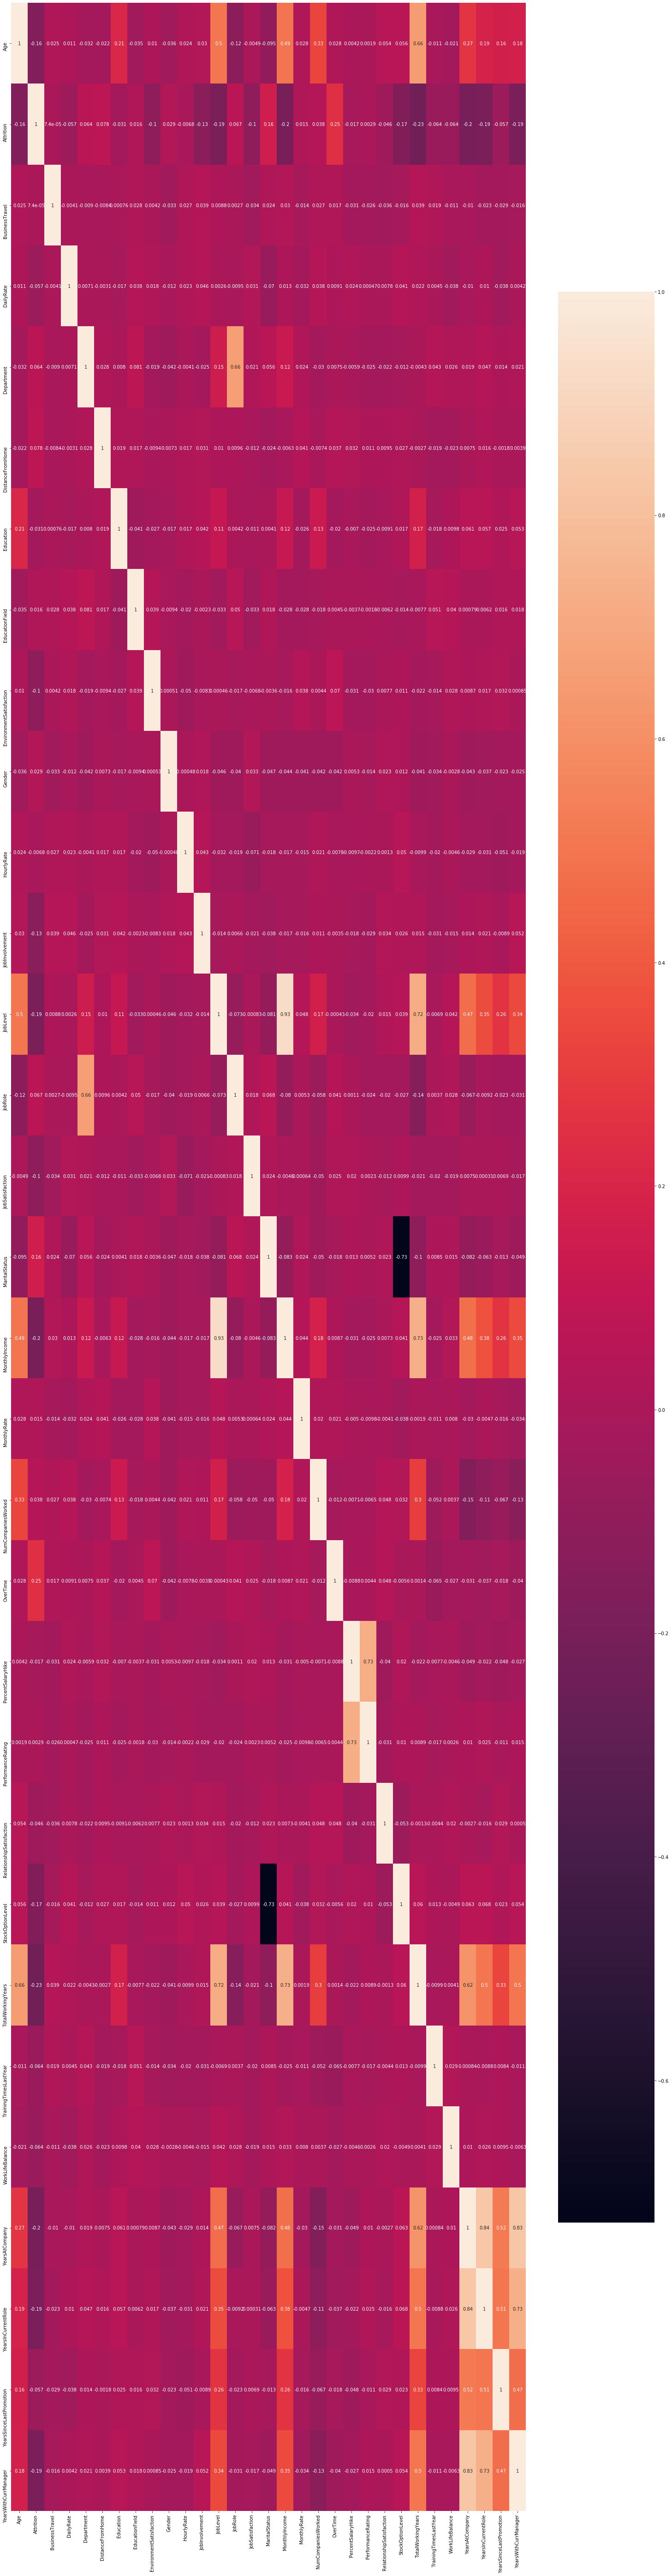

In [19]:
plt.figure(figsize=(25,100))
sns.heatmap(df1.corr(),annot=True) 

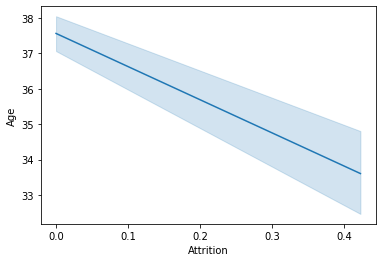

In [20]:
sns.lineplot(x='Attrition', y='Age', data=df1)     # Less the Age, more it is difficult to retain employees 

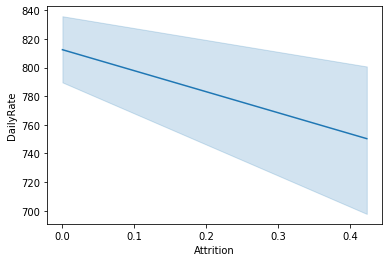

In [21]:
sns.lineplot(x='Attrition', y='DailyRate', data=df1)

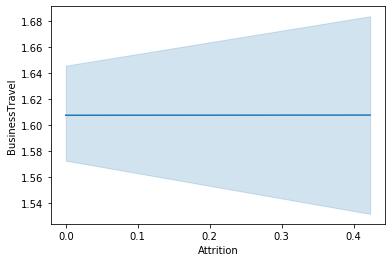

In [22]:
sns.lineplot(x='Attrition', y='BusinessTravel', data=df1)   # With BusinessTravel there is a minimum corelation with Attrition

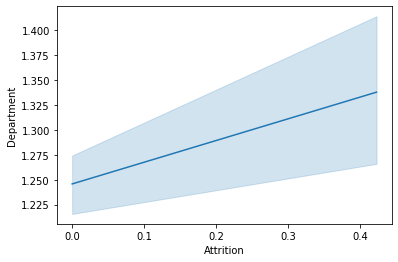

In [23]:
sns.lineplot(x='Attrition', y='Department', data=df1)

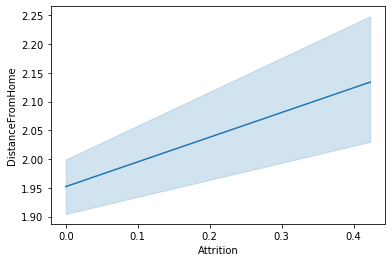

In [24]:
sns.lineplot(x='Attrition', y='DistanceFromHome', data=df1)

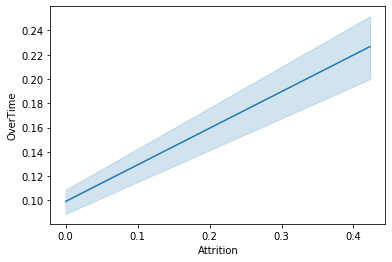

In [25]:
sns.lineplot(x='Attrition', y='OverTime', data=df1)

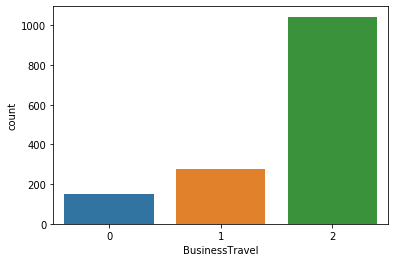

In [26]:
sns.countplot(df1['BusinessTravel'])

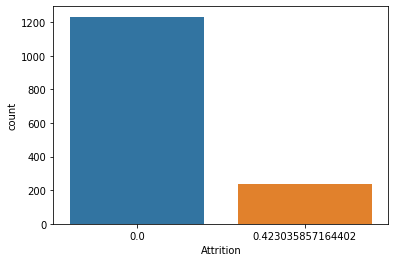

In [27]:
sns.countplot(df1['Attrition'])

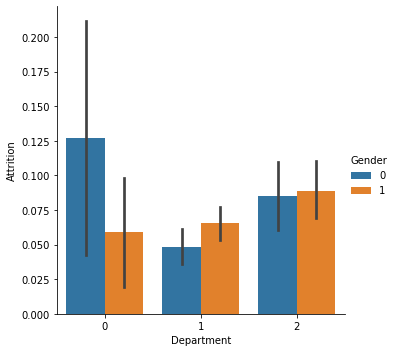

In [28]:
sns.catplot(x='Department',y='Attrition',hue='Gender',data=df1, kind='bar')

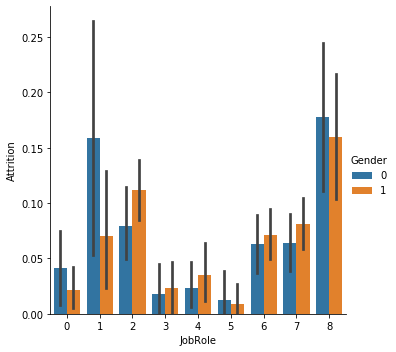

In [29]:
sns.catplot(x='JobRole',y='Attrition',hue='Gender',data=df1, kind='bar')

{'bodies': [<matplotlib.collections.PolyCollection at 0x23dd1adab48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23dd1ad3108>,
 'cmins': <matplotlib.collections.LineCollection at 0x23dd1ae3b08>,
 'cbars': <matplotlib.collections.LineCollection at 0x23dd1ae3fc8>}

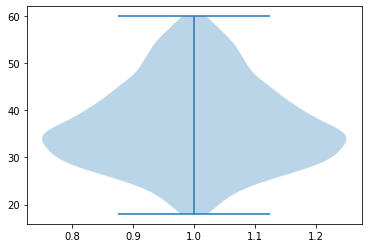

In [30]:
plt.violinplot(df1['Age'])

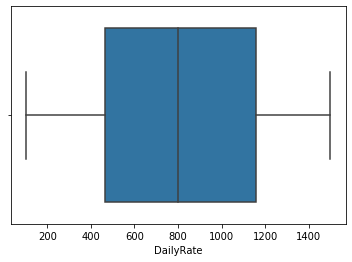

In [31]:
sns.boxplot(df1['DailyRate'])

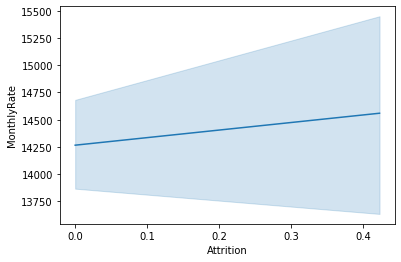

In [32]:
sns.lineplot(x='Attrition', y='MonthlyRate', data=df1)

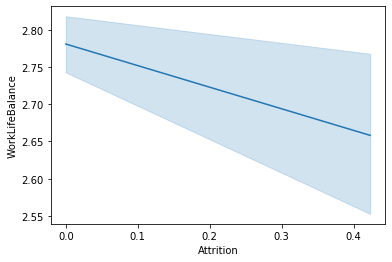

In [33]:
sns.lineplot(x='Attrition', y='WorkLifeBalance', data=df1)

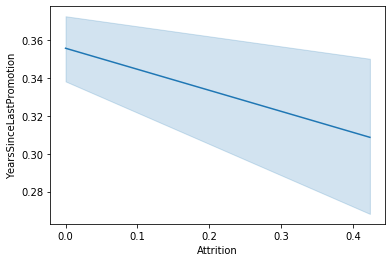

In [34]:
sns.lineplot(x='Attrition', y='YearsSinceLastPromotion', data=df1)

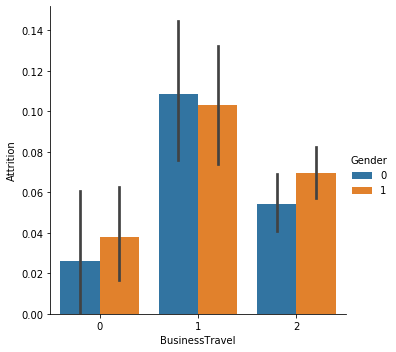

In [35]:
sns.catplot(x='BusinessTravel',y='Attrition',hue='Gender',data=df1, kind='bar')

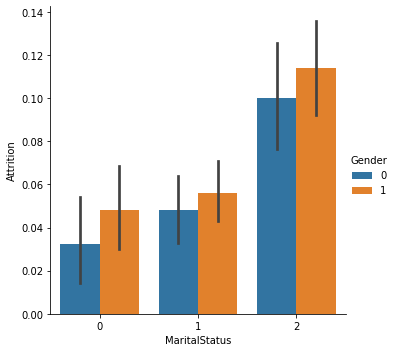

In [36]:
sns.catplot(x='MaritalStatus',y='Attrition',hue='Gender',data=df1, kind='bar')

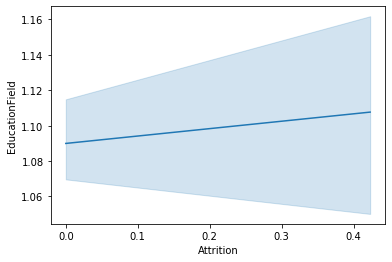

In [37]:
sns.lineplot(x='Attrition', y='EducationField', data=df1)

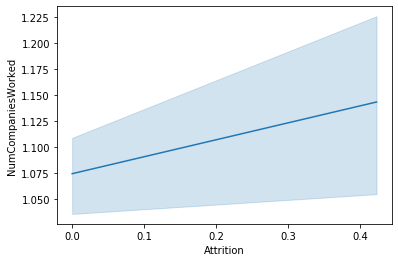

In [38]:
sns.lineplot(x='Attrition', y='NumCompaniesWorked', data=df1)

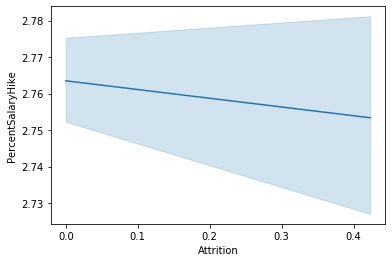

In [39]:
sns.lineplot(x='Attrition', y='PercentSalaryHike', data=df1)

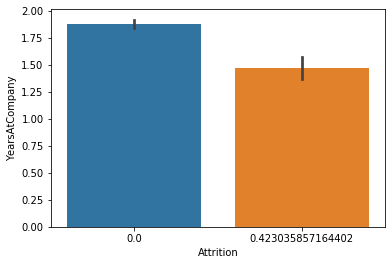

In [40]:
sns.barplot(x='Attrition', y='YearsAtCompany', data=df1) 

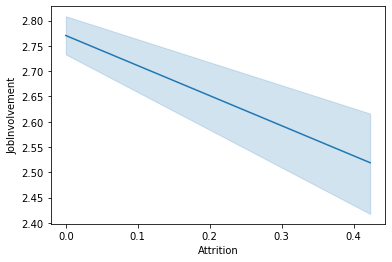

In [41]:
sns.lineplot(x='Attrition', y='JobInvolvement', data=df1)

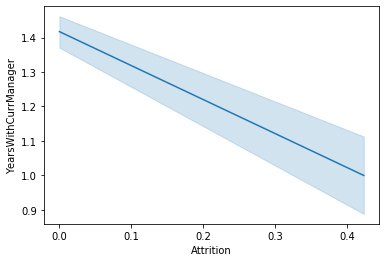

In [42]:
sns.lineplot(x='Attrition', y='YearsWithCurrManager', data=df1)

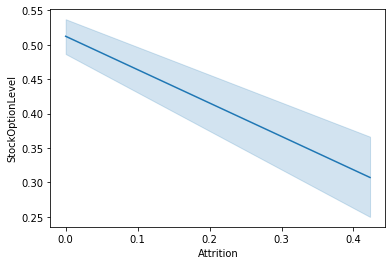

In [43]:
sns.lineplot(x='Attrition', y='StockOptionLevel', data=df1)

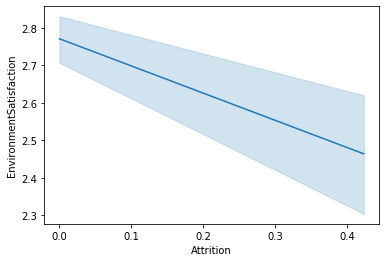

In [44]:
sns.lineplot(x='Attrition', y='EnvironmentSatisfaction', data=df1)

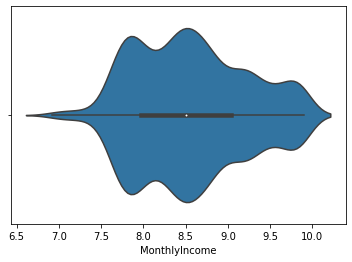

In [45]:
sns.violinplot(df1['MonthlyIncome'])

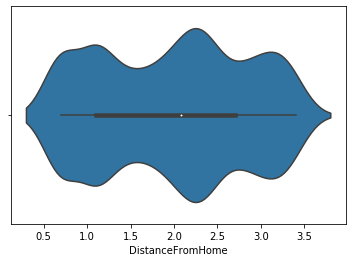

In [46]:
sns.violinplot(df1['DistanceFromHome'])

In [47]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.423036,2,1102,2,0.693147,2,0.693147,2,0,...,0.625800,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0.000000,1,279,1,2.197225,1,0.693147,3,1,...,0.672503,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.423036,2.079442
2,37,0.423036,2,1373,1,1.098612,2,1.609438,4,1,...,0.625800,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0.000000,1,1392,1,1.386294,4,0.693147,4,0,...,0.625800,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,0.625800,0.000000
4,27,0.000000,2,591,1,1.098612,1,1.386294,1,1,...,0.625800,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,0.554618,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.000000,1,884,1,3.178054,2,1.386294,3,1,...,0.625800,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,0.000000,2,613,1,1.945910,1,1.386294,4,1,...,0.625800,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.423036,2.079442
1467,27,0.000000,2,155,1,1.609438,3,0.693147,2,1,...,0.672503,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,0.000000,1,1023,2,1.098612,3,1.386294,4,1,...,0.625800,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [48]:
print(df1['Attrition'].unique()) 

[0.42303586 0.        ]


In [49]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()
df1['Attrition']=pd.DataFrame(lb.fit_transform(df1['Attrition']))
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.693147,2,0.693147,2,0,...,0.625800,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,0,1,279,1,2.197225,1,0.693147,3,1,...,0.672503,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.423036,2.079442
2,37,1,2,1373,1,1.098612,2,1.609438,4,1,...,0.625800,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.386294,4,0.693147,4,0,...,0.625800,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,0.625800,0.000000
4,27,0,2,591,1,1.098612,1,1.386294,1,1,...,0.625800,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,0.554618,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,3.178054,2,1.386294,3,1,...,0.625800,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,0,2,613,1,1.945910,1,1.386294,4,1,...,0.625800,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.423036,2.079442
1467,27,0,2,155,1,1.609438,3,0.693147,2,1,...,0.672503,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,0,1,1023,2,1.098612,3,1.386294,4,1,...,0.625800,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [50]:
x=df1.drop('Attrition',axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,0.693147,2,0,94,...,0.625800,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,0.693147,3,1,61,...,0.672503,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.423036,2.079442
2,37,2,1373,1,1.098612,2,1.609438,4,1,92,...,0.625800,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,0.693147,4,0,56,...,0.625800,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,0.625800,0.000000
4,27,2,591,1,1.098612,1,1.386294,1,1,40,...,0.625800,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,0.554618,1.098612


In [51]:
y=pd.DataFrame(df1.Attrition)
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [52]:
print(df1['Attrition'].unique()) 

[1 0]


In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [55]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=80,test_size=0.20)

In [56]:
print(train_x.shape,test_x.shape)

(1176, 30) (294, 30)


In [57]:
print(train_y.shape,test_y.shape)

(1176, 1) (294, 1)


In [58]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters={ 'criterion':['gini','entropy']}
gd=GridSearchCV(rfc,parameters,cv=5)
gd.fit(train_x,train_y)
gd.best_params_
#'n_estimator':[10,50,100,150],

{'criterion': 'entropy'}

In [59]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,20)}
gd=GridSearchCV(kn,parameters,cv=5)
gd.fit(train_x,train_y)
gd.best_params_

{'n_neighbors': 20}

In [60]:
kn=KNeighborsClassifier(n_neighbors=15) 
#r_state=maxr2_score(knr,x,y) 
kn.fit(train_x,train_y) 
pre=kn.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for KNeighborsClassifier= ',AS)


Accuracy_score for KNeighborsClassifier=  0.8401360544217688


In [61]:
sv=SVC(C=10,kernel='rbf') 
#r_state=maxr2_score(knr,x,y) 
sv.fit(train_x,train_y)
pre=sv.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for SVC= ',AS)

Accuracy_score for SVC=  0.8401360544217688


In [62]:
dt=DecisionTreeClassifier(criterion='gini') 
#r_state=maxr2_score(knr,x,y) 
dt.fit(train_x,train_y)
pre=dt.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for DTC= ',AS) 

Accuracy_score for DTC=  0.8129251700680272


In [63]:
rfc=RandomForestClassifier(criterion='entropy',n_estimators=1000) 
#r_state=maxr2_score(knr,x,y) 
rfc.fit(train_x,train_y)
pre=rfc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for rfc= ',AS)

Accuracy_score for rfc=  0.8503401360544217


In [64]:
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
#r_state=maxr2_score(knr,x,y) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for gbc= ',AS)

Accuracy_score for gbc=  0.8435374149659864


In [65]:
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
#r_state=maxr2_score(knr,x,y) 
lor.fit(train_x,train_y)
pre=lor.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for lor= ',AS)

Accuracy_score for lor=  0.8469387755102041


In [66]:
mnb=MultinomialNB(alpha=0.001,fit_prior=True)
#r_state=maxr2_score(knr,x,y) 
mnb.fit(train_x,train_y)
pre=mnb.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for MNB= ',AS)

Accuracy_score for MNB=  0.6360544217687075


In [67]:
adc=AdaBoostClassifier(base_estimator=lor,learning_rate=0.01,n_estimators=1000,algorithm='SAMME.R')
#r_state=maxr2_score(knr,x,y) 
adc.fit(train_x,train_y)
pre=adc.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score for adc= ',AS)

Accuracy_score for adc=  0.8571428571428571


In [68]:
xgb=XGBClassifier(alpha=0.01, max_depth=6)

xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score for xgb= ',AS)

Accuracy_score for xgb=  0.8469387755102041


In [69]:
# Here AdaBoostClassifier is working best so I am saving the model 

In [70]:
from sklearn.externals import joblib
joblib.dump(adc, 'adc_HR_attrition.pkl')

['adc_HR_attrition.pkl']